# nomer 1 pertama

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/farrelmanazilin/nltk_data...


True

# step 1 

In [30]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import re
from collections import Counter
import pandas as pd

paragraph = """Andy Dufresne is sentenced to two consecutive life terms in prison for the murders 
of his wife and her lover and is sentenced to a tough prison. However, only Andy knows he didn't 
commit the crimes. While there, he forms a friendship with Red, experiences brutality of prison 
life, adapts, helps the warden, etc., all in 19 years."""

sentences = nltk.sent_tokenize(paragraph)
lemmatizer = WordNetLemmatizer()
	
corpus = []
	
for i in range(len(sentences)):
    sent = re.sub('[^a-zA-Z]', ' ', sentences[i])
    sent = sent.lower()
    sent= sent.split()
    sent = [lemmatizer.lemmatize(word) for word in sent if not word in set(stopwords.words('english'))]
    sent = ' '.join(sent)   
    corpus.append(sent)
print(corpus)

['andy dufresne sentenced two consecutive life term prison murder wife lover sentenced tough prison', 'however andy know commit crime', 'form friendship red experience brutality prison life adapts help warden etc year']


# step 2

In [28]:
word = []

for i in range(len(sentences)):
    sent = re.sub('[^a-zA-Z]', ' ', sentences[i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lemmatizer.lemmatize(word) for word in sent if not word in set(stopwords.words('english'))]
    word.extend(sent)  
print(word)

['andy', 'dufresne', 'sentenced', 'two', 'consecutive', 'life', 'term', 'prison', 'murder', 'wife', 'lover', 'sentenced', 'tough', 'prison', 'however', 'andy', 'know', 'commit', 'crime', 'form', 'friendship', 'red', 'experience', 'brutality', 'prison', 'life', 'adapts', 'help', 'warden', 'etc', 'year']


# step 3

In [29]:
word_counts = Counter(word)
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

df = pd.DataFrame({'Word': list(sorted_word_counts.keys()), 'Frequency': list(sorted_word_counts.values())})
print(df)

           Word  Frequency
0        prison          3
1          andy          2
2     sentenced          2
3          life          2
4      dufresne          1
5           two          1
6   consecutive          1
7          term          1
8        murder          1
9          wife          1
10        lover          1
11        tough          1
12      however          1
13         know          1
14       commit          1
15        crime          1
16         form          1
17   friendship          1
18          red          1
19   experience          1
20    brutality          1
21       adapts          1
22         help          1
23       warden          1
24          etc          1
25         year          1


# step 4

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
independentFeatures = cv.fit_transform(corpus).toarray()
print(independentFeatures)

[[0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 2 0 2 1 1 1 0 1 0]
 [0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1]]


In [24]:
import numpy as np
corpus_column = np.array(corpus).reshape(-1, 1)
independentFeatures = np.append(corpus_column, independentFeatures, axis=1)
columns = ["kalimat"] + list(sorted_word_counts.keys()) 
df = pd.DataFrame(independentFeatures, columns=columns)
print(df)

                                             kalimat prison andy sentenced   
0  andy dufresne sentenced two consecutive life t...      0    1         0  \
1                     however andy know commit crime      0    1         0   
2  form friendship red experience brutality priso...      1    0         1   

  life dufresne two consecutive term murder  ... form friendship red   
0    0        1   0           1    0      0  ...    1          2   0  \
1    1        0   1           0    0      0  ...    0          0   0   
2    0        0   0           0    1      1  ...    0          1   1   

  experience brutality adapts help warden etc year  
0          2         1      1    1      0   1    0  
1          0         0      0    0      0   0    0  
2          0         0      0    0      1   0    1  

[3 rows x 27 columns]


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer() 
independentFeatures_tfIDF = tfidf.fit_transform(corpus).toarray()
print(independentFeatures_tfIDF)

[[0.         0.19335847 0.         0.         0.25424316 0.
  0.25424316 0.         0.         0.         0.         0.
  0.         0.         0.19335847 0.25424316 0.25424316 0.38671695
  0.         0.50848632 0.25424316 0.25424316 0.25424316 0.
  0.25424316 0.        ]
 [0.         0.35543247 0.         0.46735098 0.         0.46735098
  0.         0.         0.         0.         0.         0.
  0.46735098 0.46735098 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.29938511 0.         0.29938511 0.         0.         0.
  0.         0.29938511 0.29938511 0.29938511 0.29938511 0.29938511
  0.         0.         0.22769009 0.         0.         0.22769009
  0.29938511 0.         0.         0.         0.         0.29938511
  0.         0.29938511]]


In [26]:
independentFeatures_tfIDF = np.append(corpus_column,independentFeatures_tfIDF, axis=1)
columns = ["kalimat"] + list(sorted_word_counts.keys())
df = pd.DataFrame(independentFeatures_tfIDF, columns=columns)
print(df)

                                             kalimat              prison   
0  andy dufresne sentenced two consecutive life t...                 0.0  \
1                     however andy know commit crime                 0.0   
2  form friendship red experience brutality priso...  0.2993851103375717   

                  andy           sentenced                life   
0  0.19335847493491332                 0.0                 0.0  \
1  0.35543246785041743                 0.0  0.4673509818107163   
2                  0.0  0.2993851103375717                 0.0   

              dufresne                 two          consecutive   
0  0.25424315805691916                 0.0  0.25424315805691916  \
1                  0.0  0.4673509818107163                  0.0   
2                  0.0                 0.0                  0.0   

                 term              murder  ...                 form   
0                 0.0                 0.0  ...  0.25424315805691916  \
1                 0

In [27]:
df.to_excel("tfidf_w10.xlsx")

# nomer 1 kedua

In [81]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all')
categories = newsgroups.target_names
for category in categories:
    print(category)


alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


In [63]:
# import the dataset from sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import other required libs
import pandas as pd
import numpy as np

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns


categories = [
    'talk.politics.guns',
    'talk.politics.mideast',
    'rec.autos',
    'sci.space',
    'comp.sys.mac.hardware',
    'comp.os.ms-windows.misc',
    'rec.sport.baseball',
    'rec.sport.hockey',
    'alt.atheism',
    'soc.religion.christian'
]
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))

In [64]:
df = pd.DataFrame(dataset.data, columns=["corpus"])
df

,corpus
0,\n \nI believe the NHL Draft is on or the June...
1,Cloak yourself in God's sustaining and abiding...
2,Archive-name: space/diff\n\nDIFFS SINCE LAST F...
3,\nThis is not borne out of reality; the old So...
4,"\n\nAs a side note, in that same ad (MacWorld ..."
...,...
9559,\n\n\n\n\n\n\n
9560,\n\n Let us hope that the performance o...
9561,ac = In <9304202017@zuma.UUCP> sera@zuma.UUCP ...
9562,In <Apr.10.05.30.16.1993.14313@athos.rutgers.e...


In [65]:
stopwords.words("english")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [66]:
"""This utility function sanitizes a string by:
removing links
- removing special characters
- removing numbers
- removing stopwords
- transforming in lowercase
- removing excessive whitespaces
Args:
text (str): the input text you want to clean
remove_stopwords (bool): whether or not to remove stopwords
Returns:
str: the cleaned text
"""
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
        # return text in lowercase and stripped of whitespaces
    text = text.lower().strip()
    return text

In [67]:
df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(x, remove_stopwords = True))

In [68]:
df

,corpus,cleaned
0,\n \nI believe the NHL Draft is on or the June...,believe nhl draft june th weekend
1,Cloak yourself in God's sustaining and abiding...,cloak gods sustaining abiding love pray pray p...
2,Archive-name: space/diff\n\nDIFFS SINCE LAST F...,archivename spacediff diffs since last faq pos...
3,\nThis is not borne out of reality; the old So...,borne reality old soviet union serious domesti...
4,"\n\nAs a side note, in that same ad (MacWorld ...",side note ad macworld selling mhz powercache i...
...,...,...
9559,\n\n\n\n\n\n\n,
9560,\n\n Let us hope that the performance o...,let us hope performance spacecraft follows sen...
9561,ac = In <9304202017@zuma.UUCP> sera@zuma.UUCP ...,ac zumauucp serazumauucp serdar argic pl linde...
9562,In <Apr.10.05.30.16.1993.14313@athos.rutgers.e...,aprathosrutgersedu lived kicking screaming cat...


In [69]:
vectorizer = TfidfVectorizer(sublinear_tf = True, min_df=5,max_df=0.95)
X = vectorizer.fit_transform(df['cleaned'])
print(X.toarray())

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.1290573 0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


In [70]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_
clusters

/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [71]:
# inizializziamo la PCA con 2 componenti
pca = PCA(n_components=2, random_state=42)
# passiamo alla pca il nostro array X
pca_vecs = pca.fit_transform(X.toarray())
# salviamo le nostre due dimensioni in x0 e x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [85]:
x0

array([-0.04669882,  0.01588805, -0.01784046, ...,  0.03381258,
        0.07222043,  0.157345  ])

In [86]:
x1

array([-0.08325008, -0.00167218,  0.04984937, ..., -0.02768208,
        0.02017969,  0.03468895])

In [87]:
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [88]:
def get_top_keywords(n_terms):
    """Questa funzione restituisce le keyword per ogni centroide del KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # raggruppa il vettore TF-IDF per gruppo
    terms = vectorizer.get_feature_names_out() # accedi ai termini del tf idf
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # per ogni riga del dataframe, trova gli n termini che hanno il punteggio più alto
            
get_top_keywords(10)


Cluster 0
new,also,get,dont,know,think,like,car,one,would

Cluster 1
christ,christian,people,christians,would,believe,bible,one,jesus,god

Cluster 2
file,get,email,use,please,know,mac,anyone,thanks,windows

Cluster 3
would,play,season,players,hockey,last,year,games,team,game

Cluster 4
get,know,right,us,like,think,one,dont,would,people


In [89]:
cluster_map = {0: "science",1:"religion",2:"tecnology", 3:"sport" ,4:"politic"}
df['cluster'] = df['cluster'].map(cluster_map)

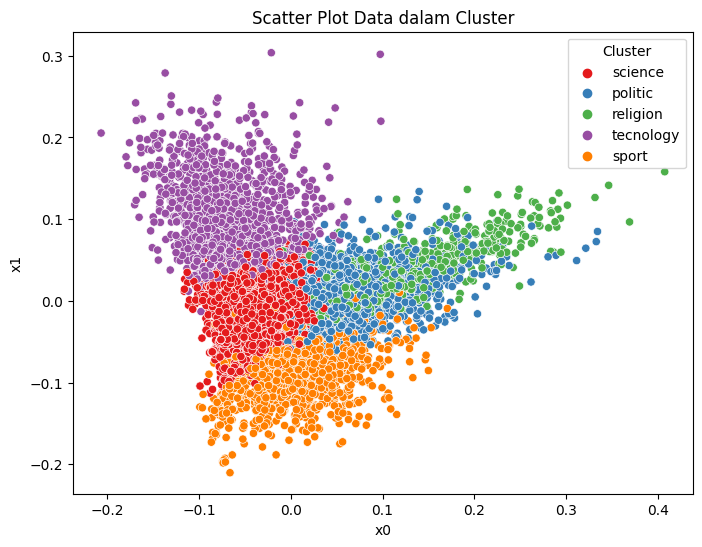

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=df['x0'], y=df['x1'], hue='cluster', palette='Set1')
plt.title('Scatter Plot Data dalam Cluster')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# nomer 2

In [91]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

len(twenty_train.data),len(twenty_test.data)

(5742, 3822)

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)
X_train_counts = tf_idf_vect.fit_transform(twenty_train.data)
X_train_counts.shape

/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(5742, 93099)

In [93]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(X_train_counts)
pred_labels = kmeans.labels_
pred_labels

/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, ..., 0, 1, 2], dtype=int32)

In [94]:
from sklearn import metrics
dbi = metrics.davies_bouldin_score(X_train_counts.toarray(), pred_labels)
ss = metrics.silhouette_score(X_train_counts.toarray(), pred_labels , metric='euclidean')
print("DBI Score: ", dbi, "\nSilhoutte Score: ", ss)

DBI Score:  12.63033233081011 
Silhoutte Score:  0.0036776507412532946


In [95]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt 


def word_cloud(text,wc_title,wc_file_name='wordcloud.jpeg'):
    stopword_list = set(STOPWORDS) 
    word_cloud = WordCloud(width = 800, height = 500, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 14).generate(text) 
    plt.figure(figsize = (8, 6)) 
    plt.title(wc_title)
    plt.imshow(word_cloud) 
    plt.axis("off")  
    plt.savefig(wc_file_name,bbox_inches='tight')
    plt.show()

In [96]:
print(text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



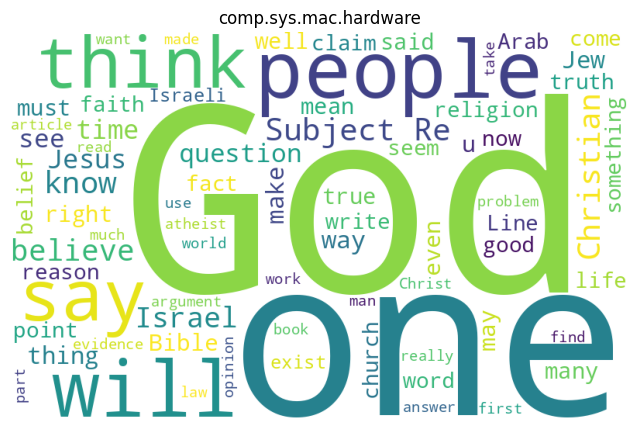

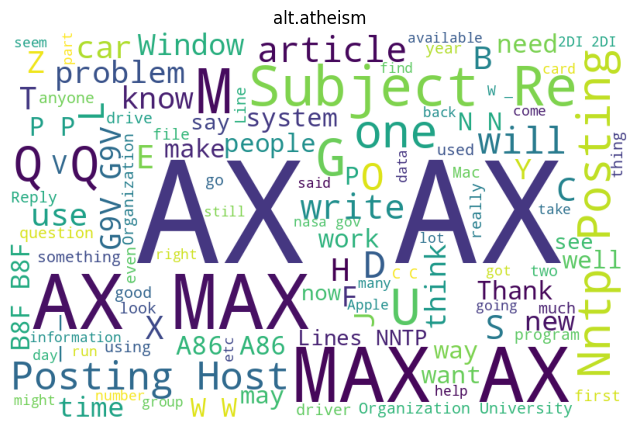

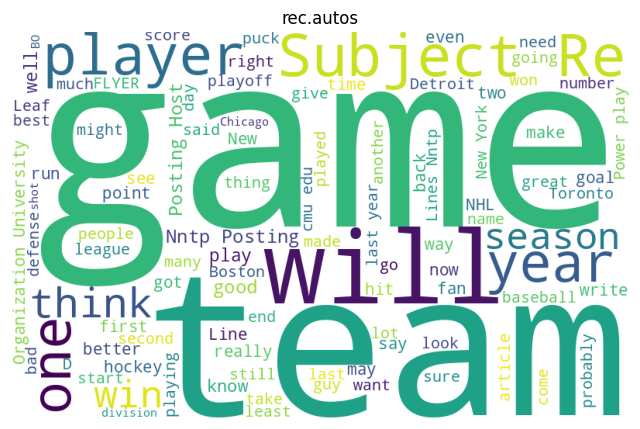

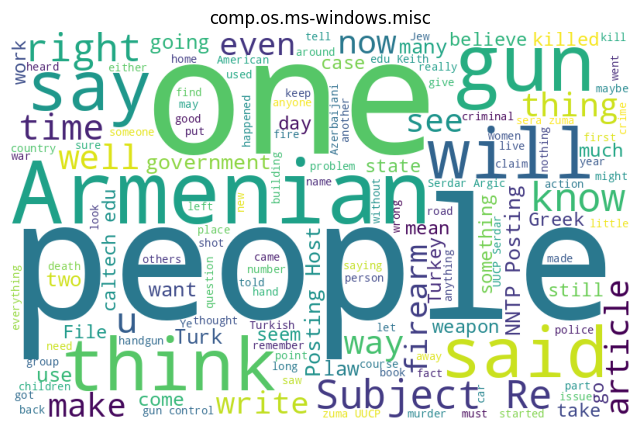

In [97]:
import pandas as pd
df=pd.DataFrame({"text":twenty_train.data,"labels":pred_labels})
for i in df.labels.unique():
    new_df=df[df.labels==i]
    text="".join(new_df.text.tolist())
    word_cloud(text,twenty_train.target_names[i], twenty_train.target_names[i]+'.jpeg')